<a href="https://colab.research.google.com/github/tasosnikitakis/Machine-and-Deep-Learning/blob/main/Feature_Selection_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation and variance threshold

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [15]:
df = pd.read_csv("data.csv")
df.head()

,Squad,# Pl,Age,Poss,Gls,Ast,G+A,G-PK,PK,PKatt,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Atalanta,27,27.4,49.9,64,42,106,58,6,8,...,1.68,1.11,2.79,1.53,2.63,1.52,1.12,2.64,1.35,2.47
1,Bologna,27,27.4,54.7,52,41,93,46,6,6,...,1.37,1.08,2.45,1.21,2.29,1.15,0.83,1.98,1.04,1.87
2,Cremonese,33,26.9,42.1,35,18,53,30,5,7,...,0.92,0.47,1.39,0.79,1.26,1.02,0.64,1.66,0.87,1.51
3,Empoli,32,26.1,47.3,35,20,55,33,2,2,...,0.92,0.53,1.45,0.87,1.39,1.02,0.71,1.73,0.98,1.69
4,Fiorentina,30,27.4,56.1,51,37,88,47,4,6,...,1.34,0.97,2.32,1.24,2.21,1.45,1.06,2.51,1.34,2.39


<ipython-input-16-6ed71aa3bbe9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CorrMat = df.corr()


<Axes: >

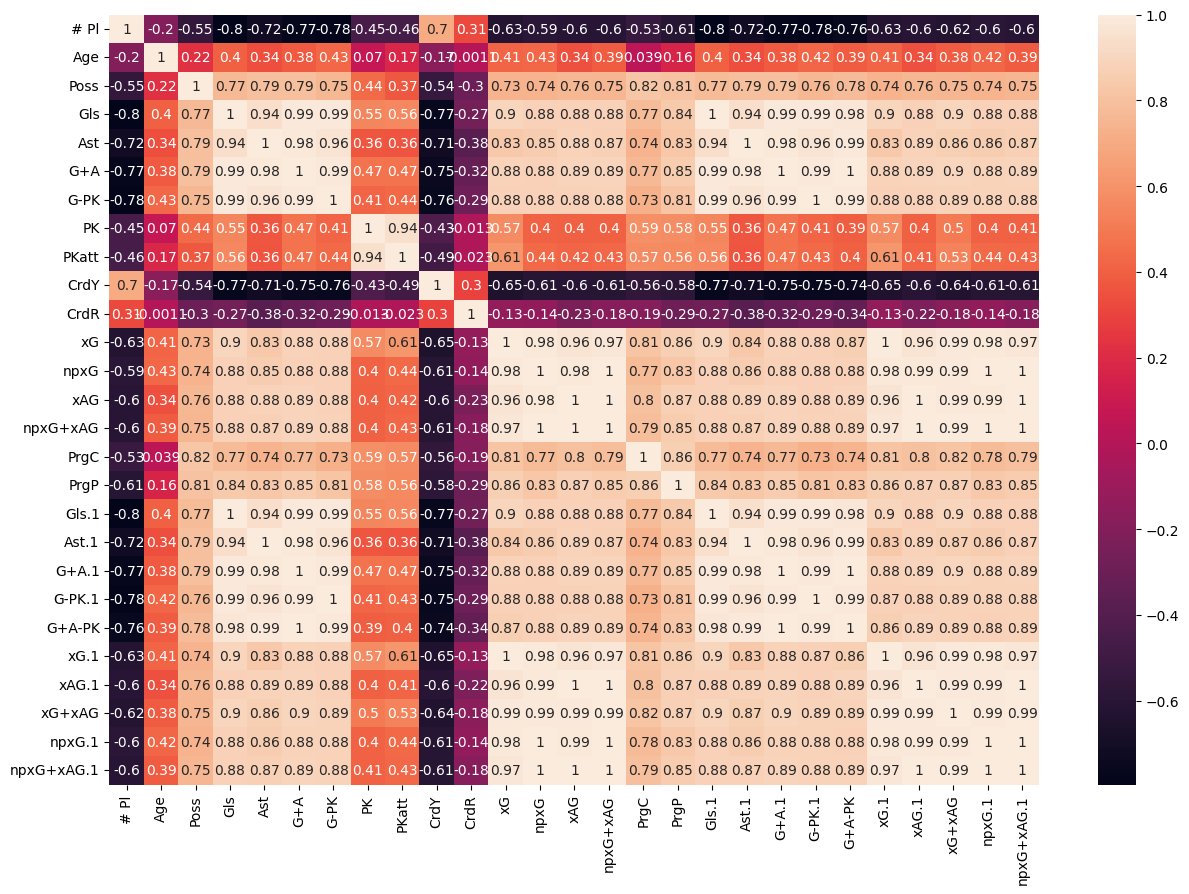

In [16]:
CorrMat = df.corr()

plt.figure(figsize = (15,10))

sns.heatmap(CorrMat, annot=True)

In [17]:
from sklearn.feature_selection import VarianceThreshold #Understand from sklearn documentation
df["MyNewCol"] = 100
df = df.iloc[: , 1:]
df.head()

,# Pl,Age,Poss,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,MyNewCol
0,27,27.4,49.9,64,42,106,58,6,8,83,...,1.11,2.79,1.53,2.63,1.52,1.12,2.64,1.35,2.47,100
1,27,27.4,54.7,52,41,93,46,6,6,84,...,1.08,2.45,1.21,2.29,1.15,0.83,1.98,1.04,1.87,100
2,33,26.9,42.1,35,18,53,30,5,7,81,...,0.47,1.39,0.79,1.26,1.02,0.64,1.66,0.87,1.51,100
3,32,26.1,47.3,35,20,55,33,2,2,88,...,0.53,1.45,0.87,1.39,1.02,0.71,1.73,0.98,1.69,100
4,30,27.4,56.1,51,37,88,47,4,6,93,...,0.97,2.32,1.24,2.21,1.45,1.06,2.51,1.34,2.39,100


In [18]:
VarThresh = VarianceThreshold(threshold=5)
VarThresh.fit(df)
VarThresh.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
#Chi square - Anova F-value

In [19]:
#iris data
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import numpy as np


iris = load_iris()


X = iris.data
y = iris.target


X = X.astype(int)


chi2_selector = SelectPercentile(chi2)
kBest = chi2_selector.fit_transform(X, y)


chi2_scores = pd.DataFrame(list(zip(iris.feature_names, chi2_selector.scores_)), columns=['feature', 'score'])
chi2_scores




# In[38]:


print('number of original features:', X.shape[1])
print('number of reduced features:', kBest.shape[1])


number of original features: 4
number of reduced features: 1


In [20]:
np.asarray(iris.feature_names)[chi2_selector.get_support()]

array(['petal length (cm)'], dtype='<U17')

In [21]:
chi2_scores

,feature,score
0,sepal length (cm),10.287129
1,sepal width (cm),5.022670
2,petal length (cm),133.068548
3,petal width (cm),74.279070


# Information Gain

In [23]:
from sklearn.feature_selection import mutual_info_classif
Data = pd.read_csv("data.csv")
Data.head()

,Squad,# Pl,Age,Poss,Gls,Ast,G+A,G-PK,PK,PKatt,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Atalanta,27,27.4,49.9,64,42,106,58,6,8,...,1.68,1.11,2.79,1.53,2.63,1.52,1.12,2.64,1.35,2.47
1,Bologna,27,27.4,54.7,52,41,93,46,6,6,...,1.37,1.08,2.45,1.21,2.29,1.15,0.83,1.98,1.04,1.87
2,Cremonese,33,26.9,42.1,35,18,53,30,5,7,...,0.92,0.47,1.39,0.79,1.26,1.02,0.64,1.66,0.87,1.51
3,Empoli,32,26.1,47.3,35,20,55,33,2,2,...,0.92,0.53,1.45,0.87,1.39,1.02,0.71,1.73,0.98,1.69
4,Fiorentina,30,27.4,56.1,51,37,88,47,4,6,...,1.34,0.97,2.32,1.24,2.21,1.45,1.06,2.51,1.34,2.39


In [ ]:
features = Data[['age', 'bmi','charges']] #continiuos
target = Data[['region']] #categorical
feature_scores = mutual_info_classif(features,target, random_state=0)
feature_scores

C:\Users\amanr\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.00055504, 0.18958508, 0.07632417])